# Using the LSTM layer in Keras

In [12]:
from keras.datasets import imdb

In [13]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.preprocessing import sequence
from keras.layers import Dense
from keras.layers import Embedding, Flatten, Dense

In [14]:
max_features = 10000
maxlen = 500
batch_size = 32

In [15]:
print('Loading data....')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

Loading data....
17473536/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences


In [18]:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [19]:

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
 

Epoch 1/10
157/157 [==============================] - 58s 359ms/step - loss: 0.5108 - acc: 0.7659 - val_loss: 0.4242 - val_acc: 0.8064
Epoch 2/10
157/157 [==============================] - 56s 354ms/step - loss: 0.3014 - acc: 0.8819 - val_loss: 0.3337 - val_acc: 0.8784
Epoch 3/10
157/157 [==============================] - 56s 357ms/step - loss: 0.2384 - acc: 0.9111 - val_loss: 0.3301 - val_acc: 0.8756
Epoch 4/10
157/157 [==============================] - 56s 357ms/step - loss: 0.2004 - acc: 0.9268 - val_loss: 0.5065 - val_acc: 0.8534
Epoch 5/10
157/157 [==============================] - 56s 354ms/step - loss: 0.1768 - acc: 0.9371 - val_loss: 0.3001 - val_acc: 0.8892
Epoch 6/10
157/157 [==============================] - 56s 356ms/step - loss: 0.1580 - acc: 0.9437 - val_loss: 0.3343 - val_acc: 0.8830
Epoch 7/10
157/157 [==============================] - 56s 356ms/step - loss: 0.1425 - acc: 0.9481 - val_loss: 0.4625 - val_acc: 0.8064
Epoch 8/10
157/157 [==============================] - 5

In [20]:
import matplotlib.pyplot as plt

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [22]:
epochs = range(1, len(acc) + 1)


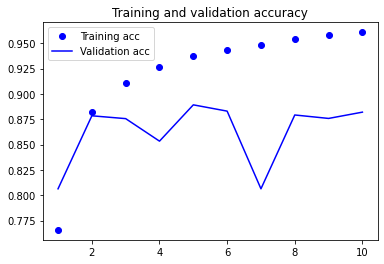

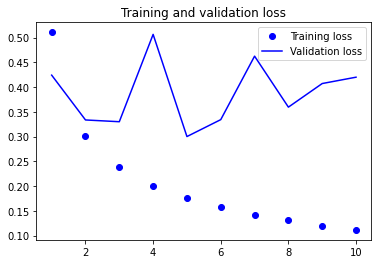

In [23]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()